Шишка Антон (30 Варіант)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

train_images original shape: (50000, 32, 32, 3)
train_labels original shape: (50000, 1)


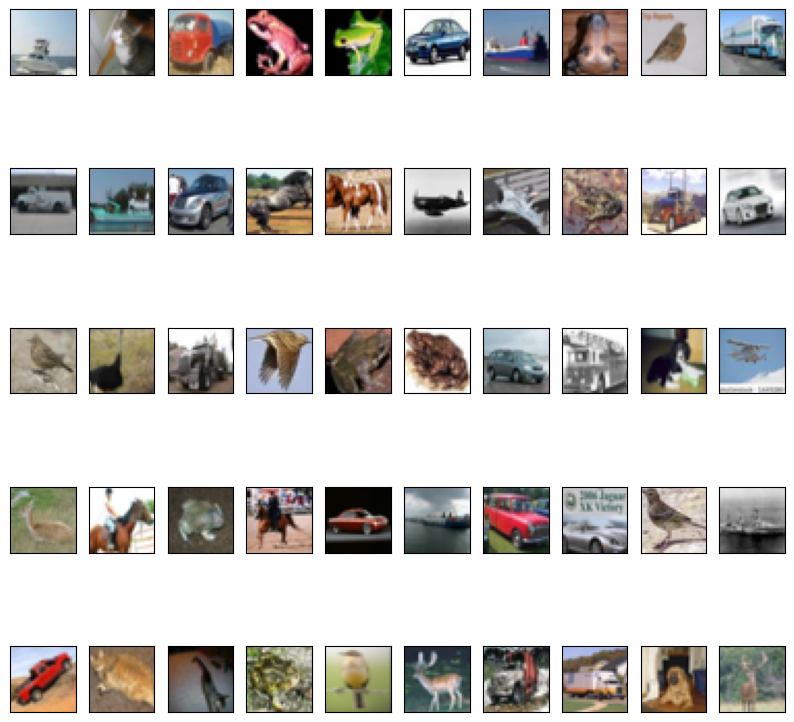

In [13]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("train_images original shape:", train_images.shape)
print("train_labels original shape:", train_labels.shape)

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

In [14]:
# Нормалізація даних
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [15]:
# Кодування категоріальних міток
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [17]:
# Будівництво моделі
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Перетворення вхідних даних у вектор
model.add(Dense(512, activation='relu'))  # Повністю з'єднаний шар з 512 нейронами та функцією активації ReLU
model.add(Dense(256, activation='relu'))  # Повністю з'єднаний шар з 256 нейронами та функцією активації ReLU
model.add(Dense(128, activation='relu'))  # Повністю з'єднаний шар з 128 нейронами та функцією активації ReLU
model.add(Dense(num_classes, activation='softmax'))  # Вихідний шар з функцією активації Softmax для класифікації

In [18]:
# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Тренування моделі
epochs = 20  # Кількість епох
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=128, validation_split=0.2)


Epoch 1/20
313/313 [==============================] - 15s 43ms/step - loss: 1.9091 - accuracy: 0.3105 - val_loss: 1.7887 - val_accuracy: 0.3584
Epoch 2/20
313/313 [==============================] - 14s 45ms/step - loss: 1.7115 - accuracy: 0.3849 - val_loss: 1.6624 - val_accuracy: 0.4053
Epoch 3/20
313/313 [==============================] - 15s 47ms/step - loss: 1.6226 - accuracy: 0.4171 - val_loss: 1.5858 - val_accuracy: 0.4402
Epoch 4/20
313/313 [==============================] - 15s 47ms/step - loss: 1.5529 - accuracy: 0.4444 - val_loss: 1.6167 - val_accuracy: 0.4333
Epoch 5/20
313/313 [==============================] - 14s 45ms/step - loss: 1.5179 - accuracy: 0.4570 - val_loss: 1.5382 - val_accuracy: 0.4481
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 1.4777 - accuracy: 0.4721 - val_loss: 1.5347 - val_accuracy: 0.4579
Epoch 7/20
313/313 [==============================] - 15s 47ms/step - loss: 1.4504 - accuracy: 0.4812 - val_loss: 1.5172 - val_accuracy:

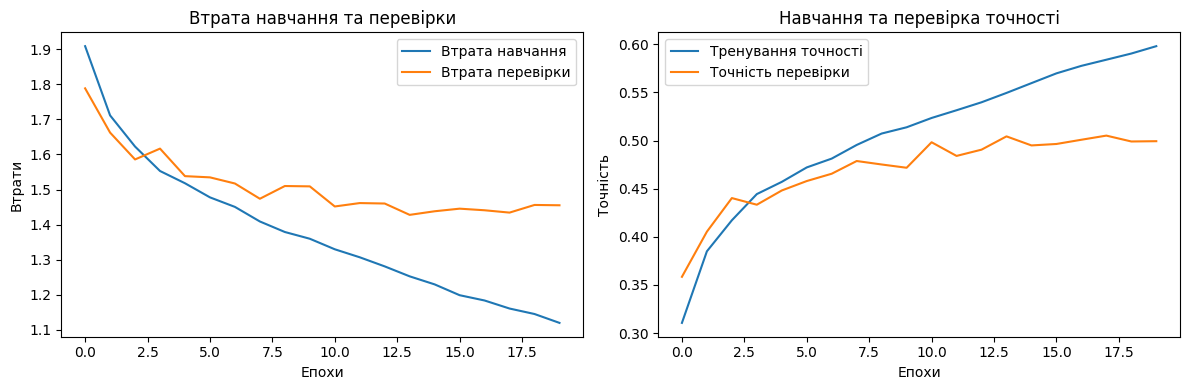

In [20]:
# Графіки функції втрат та точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрата навчання')
plt.plot(history.history['val_loss'], label='Втрата перевірки')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Втрата навчання та перевірки')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренування точності')
plt.plot(history.history['val_accuracy'], label='Точність перевірки')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.title('Навчання та перевірка точності')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Оцінка точності моделі на тестовому наборі
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Тест на точність: {test_accuracy*100:.2f}%")

313/313 [==============================] - 5s 14ms/step - loss: 1.4222 - accuracy: 0.5053
Тест на точність: 50.53%


In [23]:
# Розпізнавання зображень
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 6ms/step


In [24]:
# Вибір 10 випадкових зображень для порівняння
random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)

In [27]:
# Виведення результатів класифікації
for index in random_indices:
    predicted_class = predicted_classes[index]
    true_class = np.argmax(test_labels[index])
    print(f"Predicted class: {predicted_class}, True class: {true_class}")

Predicted class: 8, True class: 8
Predicted class: 1, True class: 1
Predicted class: 0, True class: 8
Predicted class: 4, True class: 4
Predicted class: 7, True class: 5
Predicted class: 5, True class: 5
Predicted class: 0, True class: 2
Predicted class: 0, True class: 0
Predicted class: 7, True class: 7
Predicted class: 6, True class: 4


In [28]:
# Статистика моделі
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
